<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
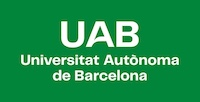
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104338 - Programació Avançada</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Visualització de dades en Python

## Instruccions d'ús

A continuació es presentaran explicacions i exemples de generació de
visualitzacions de dades en Python. Recordeu que podeu anar executant
els exemples per obtenir-ne els resultats.

## Introducció

En mòduls anteriors ja hem vist com generar algunes visualitzacions
bàsiques de dades amb la llibreria
[Matplotlib](https://matplotlib.org/). En aquest mòdul ens centrarem en
la generació de visualitzacions de dades més avançades. En primer lloc,
veurem algunes funcionalitats de la llibreria
[seaborn](https://seaborn.pydata.org/), que ens proveeix d'una
interfície d'alt nivell a Matplotlib amb la qual generar gràfiques
atractives amb poques línies de codi. En segon lloc, veurem com
representar dades de xarxes en forma de grafs amb la llibreria
[Networkx](https://networkx.github.io/). Finalment, veurem com podem
representar dades espacials sobre mapes amb la llibreria
[geoplotlib](https://github.com/andrea-cuttone/geoplotlib).

A més de les llibreries que acabem d'esmentar, durant aquest mòdul
farem servir també les llibreries que ja hem anat presentant als mòduls
anteriors: [NumPy](http://www.numpy.org/),
[pandas](http://pandas.pydata.org/) i
[scikit-learn](http://scikit-learn.org).

## Primers passos

Per començar, importem les llibreries que usarem en aquest Notebook i
que ja hem presentat anteriorment.

In [3]:
# Importem NumPy, pandas, Matplotlib i els datasets de Sklearn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Mostrem les gràfiques al Notebook.
%matplotlib inline

## Gràfiques amb Seaborn

En primer lloc, veurem alguns exemples de generació de gràfiques amb la
llibreria [seaborn](https://seaborn.pydata.org/). Per fer-ho, farem servir el
conjunt de dades de flors iris que ja hem vist en mòduls anteriors.

In [5]:
# Carreguem el dataset d'iris:
iris = datasets.load_iris()

# Guardem les dades a la variable 'data'.
data = iris.data

# Creguem un dataframe de pandas amb les dades.
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])

# Mostrem les primeres cinc files del dataframe.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


La funció
[jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html)
permet crear una gràfica de dues variables, oferint tant informació
conjunta sobre les variables com marginal. La mateixa funció pot ser
utilitzada per crear diferents tipus de gràfiques. Vegem-ne alguns
exemples.

Per començar, crearem una gràfica de dispersió (en anglès, *scatter
plot*) representant les mostres segons les característiques del sèpal. A
més, mostrarem histogrames marginals (que representaran la distribució
d'ambdues característiques de manera individual).

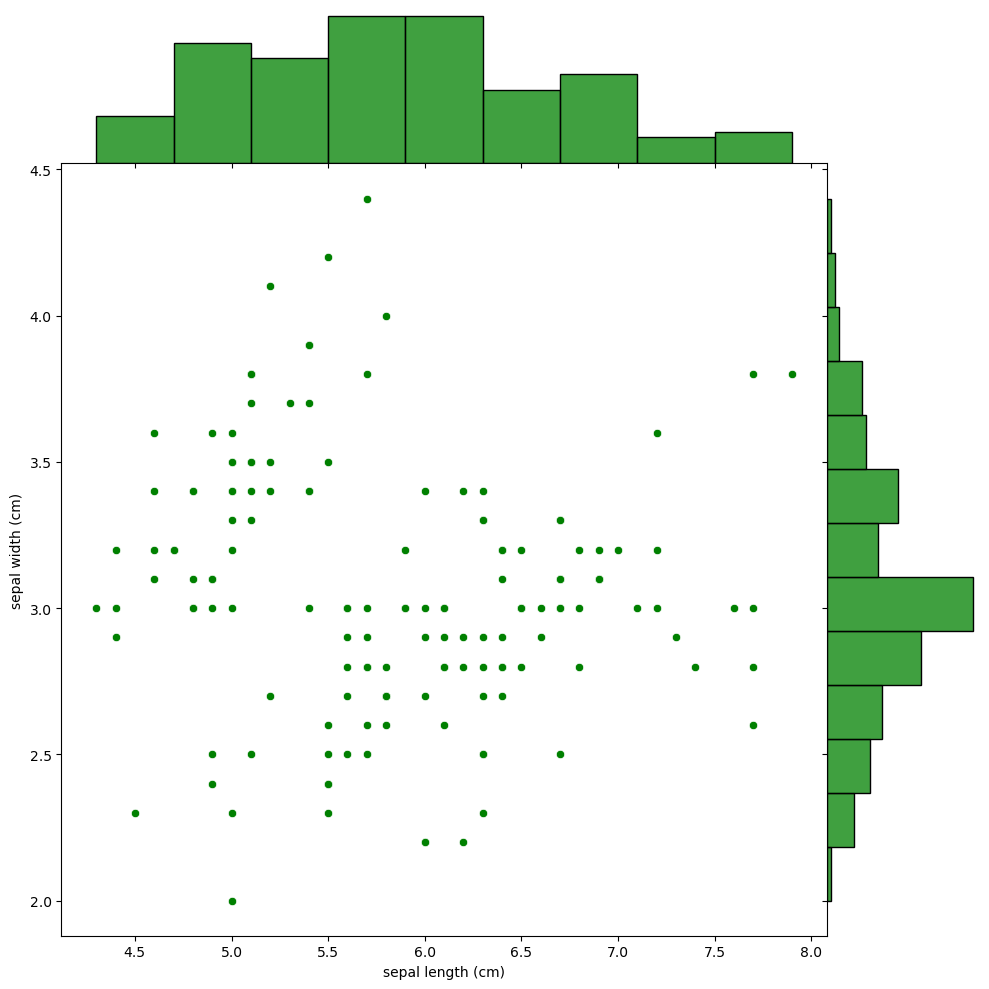

In [7]:
# Importem la llibreria seaborn.
import seaborn as sns

# Creem un jointplot de tipus "scatter", indicant els noms de les dues columnes
# que volem utilitzar com a variables, el color i la grandària de la figura.
g = sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", 
                  data=df, 
                  kind="scatter", 
                  space=0, color="g", height=10)

La gràfica de dispersió ens ofereix una primera aproximació a les dades:
podem veure que les mostres estan distribuïdes segons la longitud i
l'amplada del sèpal.

La funció _jointplot_ és molt versàtil. Utilitzant la mateixa funció però
canviant el tipus de gràfic a `hex`, podem substituir el diagrama de
dispersió per un histograma conjunt fent servir intervals (*bins*) hexagonals.

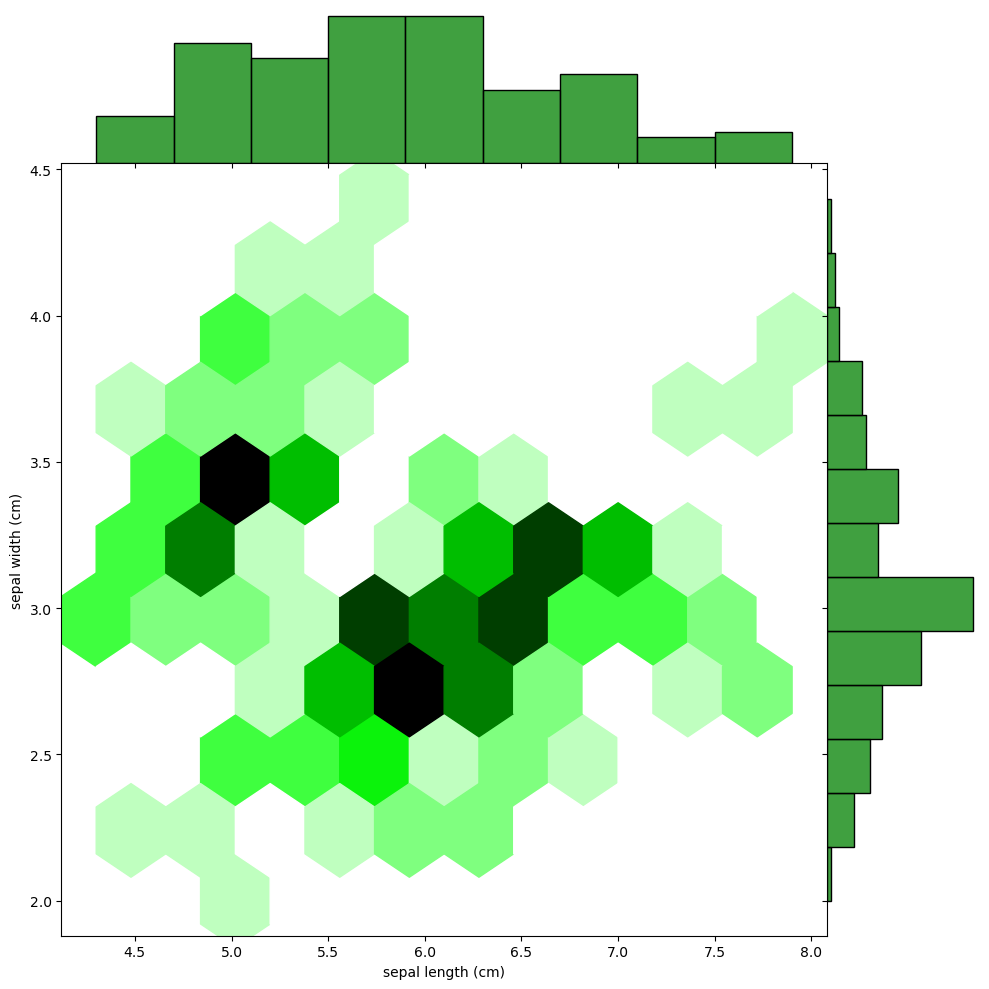

In [9]:
# Importem la llibreria seaborn.
import seaborn as sns

# Creem un jointplot de tipus "hex", indicant els noms de les dues columnes
# que volem utilitzar com a variables, el color i la grandària de la figura.
g = sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", 
                  data=df, 
                  kind="hex", 
                  space=0, color="g", height=10)

El diagrama de tipus `hex` ens permet també veure la distribució de les
mostres, ometent els efectes de petites variacions i focalitzant-se, per
tant, a transmetre la informació amb més granularitat.

De manera anàloga, podem crear també un diagrama amb una [estimació de
la funció de
densitat](https://en.wikipedia.org/wiki/kernel_density_estimation) (en
anglès, *KDE* o *Kernel density estimation*).

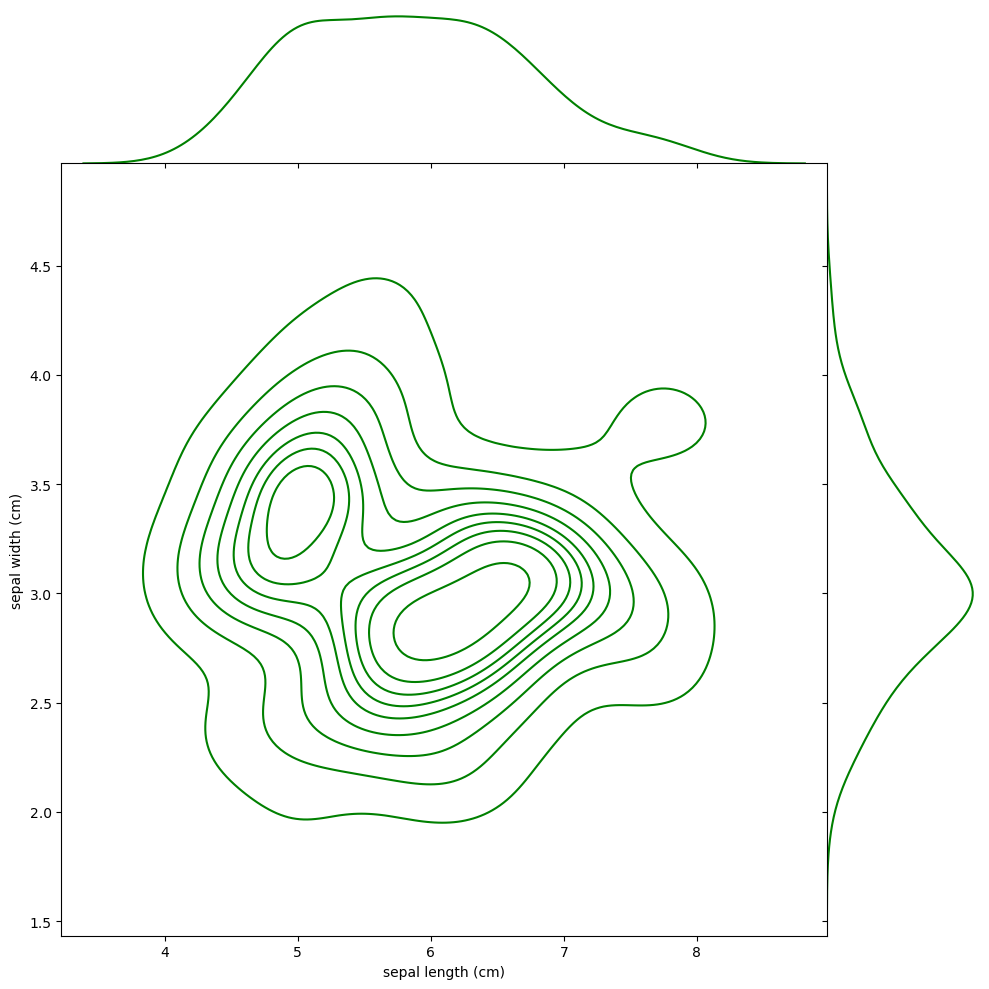

In [11]:
# Importem la llibreria seaborn.
import seaborn as sns

# Creem un jointplot de tipus "kde", indicant els noms de les dues columnes
# que volem utilitzar com a variables, el color i la grandària de la figura.
g = sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", 
                  data=df, 
                  kind="kde", 
                  space=0, color="g", height=10)

Una altra funció molt útil de la llibreria seaborn és
[_pairplot_](http://seaborn.pydata.org/generated/seaborn.pairplot.html),
que crea una matriu de gràfiques amb les relacions entre parells de
variables del conjunt de dades.

Així, per al conjunt d'iris que conté cinc columnes (els quatre atributs
i la classe), _pairplot_ generarà una matriu de 5x5, mostrant diagrames de
dispersió per a cada parell de variables. A la diagonal es mostra un
histograma dels valors de la variable.

/Users/jcasasr/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


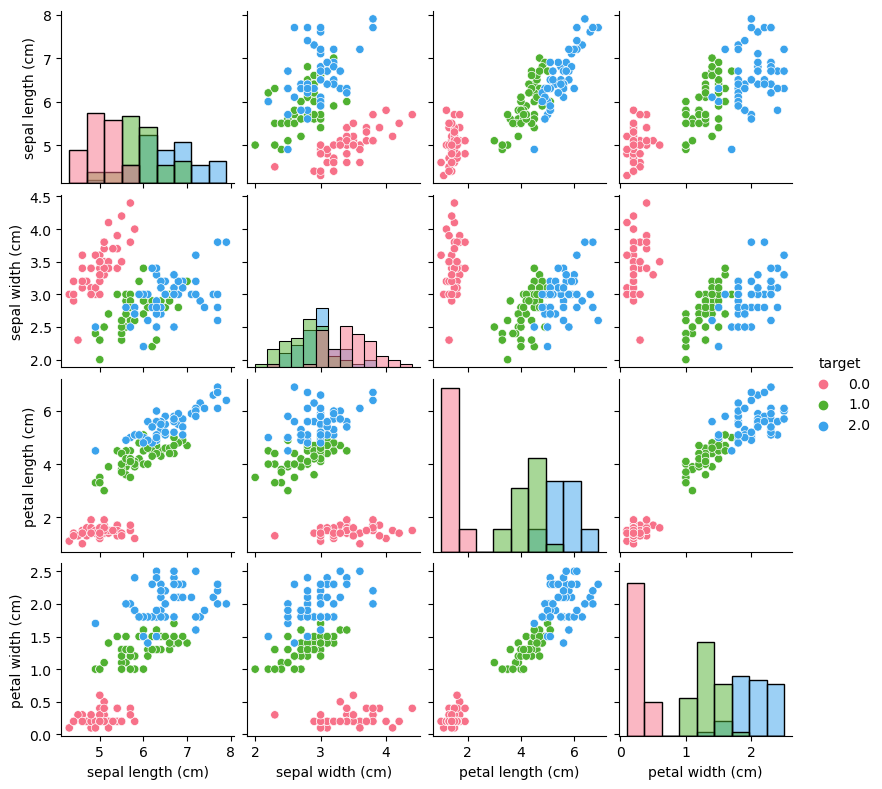

In [13]:
# Importem la llibreria seaborn.
import seaborn as sns

# Generem un pairplot acolorint les mostres segons la classe a la qual pertanyen
# i especificant una paleta de colors concreta.
sns.pairplot(df, hue="target", height=2, palette=sns.color_palette("husl", 3), diag_kind='hist')

Aquesta visualització és molt útil per aproximar-nos per primera vegada
a les dades. Així, per exemple, si estiguéssim afrontant un problema de
classificació, podríem tenir una idea de quins atributs ens seran més
útils per a la classificació o de quin tipus d'algorismes ens servirien
per afrontar el problema.

Seaborn també ens permet generar mapes de calor o *heatmaps*. Per
exemple, podem calcular la correlació entre cada parell d'atributs del
nostre conjunt de dades i mostrar-ho en un mapa de calor:

/var/folders/hr/4b_tm1190gj2tt33yn77h5fh0000gn/T/ipykernel_32084/2887534431.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


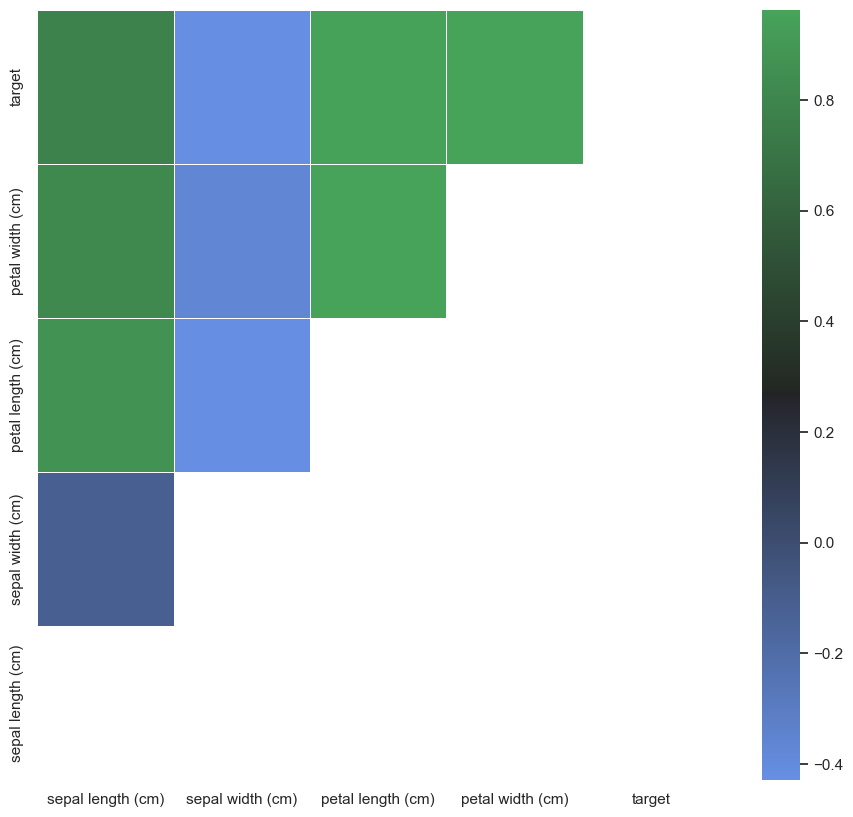

In [15]:
import seaborn as sns


sns.set(style="white")

# Calculem la correlació entre atributs.
corr = df.corr()

# Generem una màscara triangular (una matriu de la mateixa grandària que la matriu
# de correlacions, amb valors False al triangle inferior i True a la resta).
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generem la figura matplotlib.
f, ax = plt.subplots(figsize=(11, 10))

# Creem un mapa de colors.
cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark", as_cmap=True)

# Dibuixem el mapa de calor, utilitzant com a màscara la matriu mask i
# els colors especificats.
sns.heatmap(corr, mask=mask, cmap=cmap, 
            xticklabels=list(df), yticklabels=(list(df)),
            linewidths=.5, ax=ax)

# Per un error a la versió de matplotlib, cal especificar manualment
# els límits de l'eix y
# Aquesta instrucció es podrà eliminar quan fem servir matplotlib 3.1.2
_ = plt.ylim((0,5))

Fixeu-vos que hem generat i aplicat una màscara per evitar que es
mostrin valors repetits, ja que la matriu de correlació és simètrica:

In [17]:
print(mask)

[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]]


## Grafs amb Networkx

Podem generar una representació gràfica d'un graf
[Networkx](https://networkx.github.io/) amb la funció `draw`.

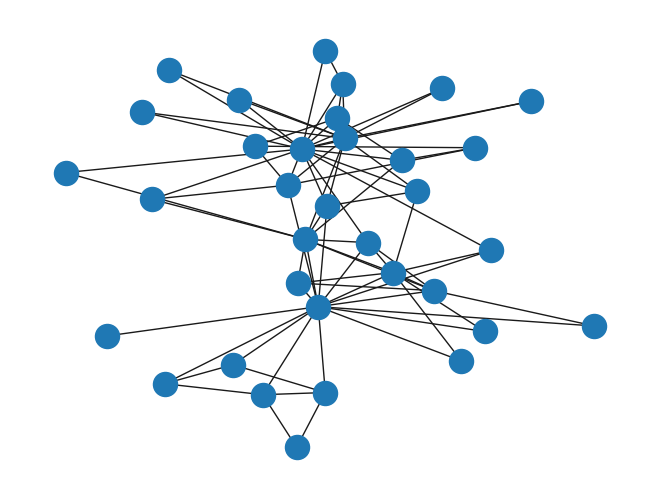

In [19]:
# Importem la llibreria Networkx.
import networkx as nx

# Importem el graf del club de karate Zachary.
G = nx.karate_club_graph()

# Vam mostrar el graf.
nx.draw(G)

Networkx permet ajustar la visualització del graf, seleccionant els
colors i grandàries dels nodes i arestes i decidint la posició de cada
node al plànol en funció d'un algorisme concret. Generarem una
representació gràfica del graf anterior que representi el grau dels
nodes amb la grandària.

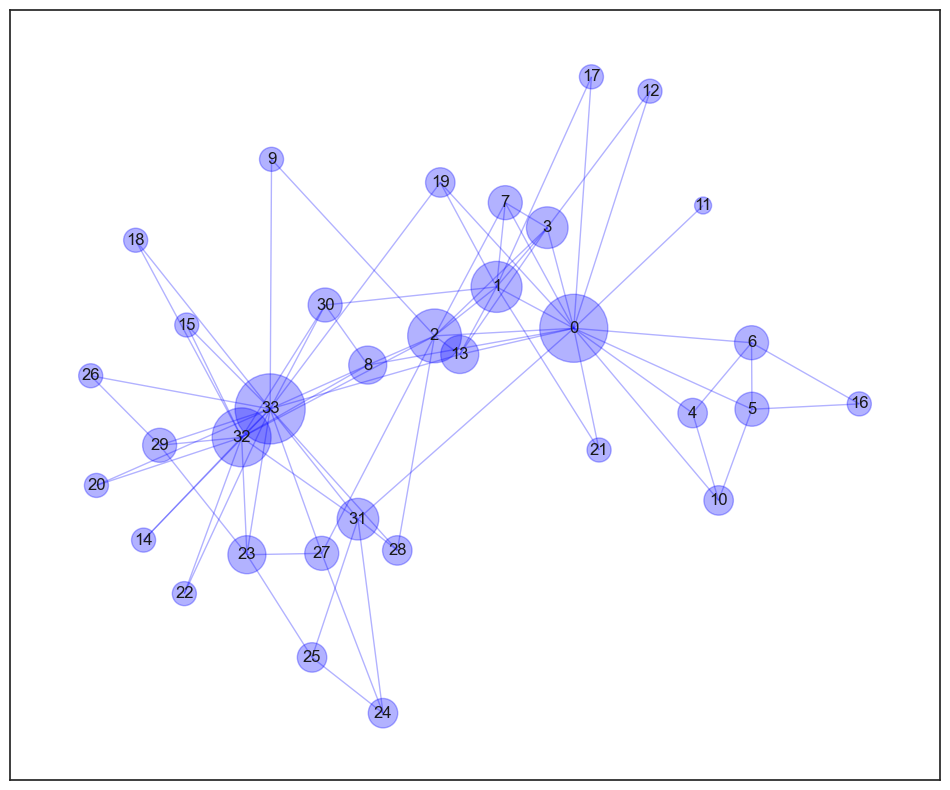

In [21]:
# Generem una nova figura.
plt.figure(1, figsize=(12, 10)) 

# Calculem les posicions dels nodes del graf al plànol amb l'algorisme
# spring.
graph_pos = nx.spring_layout(G)

# Calculem el grau dels nodes del graf.
d = nx.degree(G)

# Mostrem els nodes del graf, especificant la posició, la grandària (en funció del grau), 
# el color i la transparència.
nx.draw_networkx_nodes(G, graph_pos, 
                       node_size=[v[1] * 150 for v in d], 
                       node_color='blue', 
                       alpha=0.3)

# Mostrem les arestes del graf, especificant-ne la posició, 
# el color i la transparència.
nx.draw_networkx_edges(G, graph_pos, edge_color='blue', alpha=0.3)

# Mostrem les etiquetes, indicant-ne la font i la grandària.
a = nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')

També podem utilitzar el color dels nodes per representar-ne propietats.
Per exemple, el color es pot fer servir per representar la comunitat a la qual
pertanyen. La comunitat a la qual pertany cada node pot obtenir-se de
l'execució d'un algorisme de [detecció de
comunitats](https://en.wikipedia.org/wiki/community_structure).

In [38]:
# Generem una nova figura.
plt.figure(1, figsize=(12, 10)) 

# Calculem les posicions dels nodes del graf en el plànol amb l'algorisme
# spring.
graph_pos = nx.spring_layout(G)

# Detectem les comunitats existents al graf.
partition = nx.community.girvan_newman(G)

# Definim els colors que utilitzarem pels nodes.
colors = ['green', 'blue', 'red', 'orange', 'yellow', 'magenta', 'white']

# Per a cada comunitat detectada, en mostrem els nodes:
for count, com in enumerate(set(partition.values())):

    # Seleccionem els nodes de la comunitat que estem processant.
    list_nodes = [nodes for nodes in partition.keys() 
                  if partition[nodes] == com]

    # Mostrem els nodes, acolorits segons la comunitat a la qual pertanyen.
    nx.draw_networkx_nodes(G, graph_pos, list_nodes, 
                           node_size = 800,
                           node_color = colors[count],
                           alpha = 0.5)

# Mostrem les arestes del graf, especificant-ne la posició, 
# el color i la transparència.
nx.draw_networkx_edges(G, graph_pos, edge_color='k', alpha=0.3)

# Mostrem les etiquetes, indicant-ne la font i la grandària.
a = nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')

AttributeError: 'generator' object has no attribute 'values'

<Figure size 1200x1000 with 0 Axes>

Mapes amb geoplotlib
--------------------

Vegem alguns exemples de visualització de dades sobre mapes.

Primer, mostrarem un conjunt de punts geoespacials en un mapa.

In [ ]:
# Importem la llibreria geoplotlib.
import geoplotlib

# Carreguem el fitxer bus.csv, que conté coordenades geogràfiques de parades d'autobusos.
data = geoplotlib.utils.read_csv('../data/bus.csv')

# Mostrem els punts del fitxer directament sobre un mapa en color blau.
geoplotlib.dot(data, color='b', point_size=0.75)

# Mostrem el mapa dins del Notebook.
geoplotlib.inline()

Nota: si el mapa no es carrega correctament, torneu a executar el codi
una segona vegada.

Fixeu-vos que el fitxer de dades conté tres atributs: dos d'ells
ens indiquen la posició geogràfica (latitud i longitud) i el tercer
conté el nom. Els dos primers atributs (``lat`` i ``lon``) són
utilitzats per Geoplotlib per saber en quin lloc del mapa ha de mostrar
el punt que representa cada mostra.

In [ ]:
# Mostrem un resum de les dades.
print(data)

# Representem la primera mostra com a exemple.
print(data.head(1).values())

Amb Geoplotlib es poden generar també mapes interactius. Generarem la
mateixa visualització que a l'exemple anterior de manera interactiva.

In [ ]:
# Importem la llibreria geoplotlib.
import geoplotlib

# Carreguem el fitxer bus.csv, que conté coordenades geogràfiques de parades d'autobusos.
data = geoplotlib.utils.read_csv('data/bus.csv')

# Mostrem els punts del fitxer directament sobre un mapa en color blau.
geoplotlib.dot(data, color='b', point_size=0.75)

# Mostrem el mapa de manera interactiva.
geoplotlib.show()

Fixeu-vos que l'única diferència és l'última instrucció, en la qual
indiquem la manera de visualització.

A la visualització interactiva podem utilitzar la rodeta del ratolí o
les tecles `i`/`o` per ajustar el zoom de la imatge i moure el ratolí
deixant el botó esquerre premut o les tecles `a`/`d`/`w`/`s` per moure
la visualització.

En segon lloc, representarem un graf al qual els nodes es troben
geoposicionats.

In [ ]:
# Importem la llibreria geoplotlib.
import geoplotlib

# Carreguem el fitxer flights.csv, que conté dades sobre vols.
data = geoplotlib.utils.read_csv('../data/flights.csv')

# Mostrem el graf projectat sobre el mapa, indicant els atributs que informen
# de la longitud i la latitud del node d'origen i destinació per a cada aresta.
geoplotlib.graph(data,
                 src_lat='lat_departure',
                 src_lon='lon_departure',
                 dest_lat='lat_arrival',
                 dest_lon='lon_arrival',
                 color='afmhot_r',
                 alpha=16,
                 linewidth=2)

# Mostrem el mapa dins del Notebook.
geoplotlib.inline()

En aquest cas, cadascuna de les files del fitxer `flights.csv` representa
una de les arestes del graf, que queda determinada per la posició del
node d'origen (``lat_departure`` i ``lon_departure``) i del node de
destinació (``lat_arrival`` i ``lon_arrival``).

In [ ]:
# Mostrem un resum de les dades.
print(data)

# Representem la primera mostra com a exemple.
print(data.head(1).values())

En tercer lloc, veurem com podem delimitar zones a mapes i generar
visualitzacions que aprofitin aquestes zones. En concret, generarem un
mapa dels Estats Units, acolorint els comtats segons la seva ràtio de
desocupació.

In [ ]:
# Importem les llibreries geoplotlib i json.
import geoplotlib
import json

# Definim la funció 'get_color', que retorna el color amb el qual ha de pintar-se
# cada comtat segons la taxa de desocupació (emmagatzemada a la variable 'unemployment')
# i el mapa de colors triat (emmagatzemat a la variable 'cmap').
def get_color(properties):
    key = str(int(properties['STATE'])) + properties['COUNTY']
    if key in unemployment:
        return cmap.to_color(unemployment.get(key), .15, 'lin')
    else:
        return [0, 0, 0, 0]

# Obrim i carreguem el fitxer unemployment.json.
with open('../data/unemployment.json') as fin:
    unemployment = json.load(fin)

# Seleccionem un mapa de color.
cmap = geoplotlib.colors.ColorMap('Blues', alpha=255, levels=10)

# Dibuixem els polígons que delimiten els comtats, pintant-los segons ens indiqui la funció
# 'get_color'.
geoplotlib.geojson('../data/gz_2010_us_050_00_20m.json', 
                   fill=True, 
                   color=get_color, 
                   f_tooltip=lambda properties: properties['NAME'])

# Pintem els perímetres dels polígons de color blanc.
geoplotlib.geojson('../data/gz_2010_us_050_00_20m.json', 
                   fill=False, 
                   color=[255, 255, 255, 64])

# Fixem la visualització als Estats Units.
geoplotlib.set_bbox(geoplotlib.utils.BoundingBox.USA)

# Vam mostrar el mapa dins del Notebook.
geoplotlib.inline()

Fixeu-vos que en aquest cas hem fet servir dades de dos fitxers diferents
per realitzar la visualització. D'una banda, el fitxer
``gz_2010_us_050_00_20m.json`` conté la definició dels polígons
que delimiten els comtats. D'altra banda, el fitxer
``unemployment.json`` inclou la ràtio de desocupació a cada comtat, que
hem usat per acolorir el mapa.

Quan hem dibuixat els polígons plens de colors, hem
especificat el paràmetre ``f_tooltip``. Aquest paràmetre permet definir
la informació que es mostrarà al mapa interactiu quan passem el
ratolí per sobre de la zona. Vegem-ho generant una visualització
interactiva del mateix mapa.

In [ ]:
# Dibuixem els polígons que delimiten els comtats, pintant-los segons ens indiqui la funció
# 'get_color'.
geoplotlib.geojson('../data/gz_2010_us_050_00_20m.json', 
                   fill=True, 
                   color=get_color, 
                   f_tooltip=lambda properties: properties['NAME'])

# Pintem els perímetres dels polígons de color blanc.
geoplotlib.geojson('../data/gz_2010_us_050_00_20m.json', 
                   fill=False, 
                   color=[255, 255, 255, 64])

# Fixem la visualització als Estats Units.
geoplotlib.set_bbox(geoplotlib.utils.BoundingBox.USA)

# Mostrem el mapa interactiu.
geoplotlib.show()